In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
%matplotlib inline

In [2]:
df = pd.read_csv('vehicle (1).csv')

In [3]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [5]:
df.shape

(846, 19)

In [6]:
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [7]:
df.dropna(inplace = True)

In [8]:
df.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,813.000000,813.000000,813.00000,813.000000,813.000000,813.000000,813.000000,813.00000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000
mean,93.656827,44.803198,82.04305,169.098401,61.774908,8.599016,168.563346,40.98893,20.558426,147.891759,188.377614,438.382534,174.252153,72.399754,6.351784,12.687577,188.979090,195.729397
std,8.233751,6.146659,15.78307,33.615402,7.973000,4.677174,33.082186,7.80338,2.573184,14.504648,31.165873,175.270368,32.332161,7.475994,4.921476,8.926951,6.153681,7.398781
min,73.000000,33.000000,40.00000,104.000000,47.000000,2.000000,112.000000,26.00000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.00000,141.000000,57.000000,7.000000,146.000000,33.00000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,6.000000,184.000000,191.000000
50%,93.000000,44.000000,79.00000,167.000000,61.000000,8.000000,157.000000,43.00000,20.000000,146.000000,179.000000,364.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,100.000000,49.000000,98.00000,195.000000,65.000000,10.000000,198.000000,46.00000,23.000000,159.000000,217.000000,586.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.00000,333.000000,138.000000,55.000000,265.000000,61.00000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [9]:
df.shape

(813, 19)

##### standardising the values

In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scale = sc.fit_transform(df.iloc[:,:-1])

##### PCA

In [11]:
from sklearn.decomposition import PCA

pc = PCA(n_components=len(df.columns)-1)
p_comp = pc.fit_transform(scale)

In [12]:
df_pca = pd.DataFrame(p_comp,columns = df.columns[:-1])

In [13]:
df_pca.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.352249,-0.141027,0.961832,0.190872,0.069616,-0.740301,-0.882080,-0.388323,-0.908189,0.087236,0.011048,0.035379,-0.185637,-0.202200,0.184974,0.091062,-0.020625,-0.047769
1,-1.578072,-0.422197,-0.365261,0.239334,0.685899,-0.530580,0.345639,0.258324,0.137883,-0.093291,0.497768,-0.265891,-0.040406,-0.070293,0.070994,-0.036181,0.040015,0.026009
2,3.782556,0.253257,0.061756,1.216416,0.717337,0.728388,-0.015941,0.478896,-0.275968,-0.477401,0.258087,-0.144333,-0.058469,-0.061558,-0.001669,-0.127062,0.170354,-0.014654
3,-1.713214,-2.819496,0.186835,0.379588,-0.357389,-0.514101,0.450872,-0.011059,-0.061825,0.456355,0.374730,0.029172,0.191231,-0.235635,-0.079262,0.098868,-0.087823,0.000887
4,0.532165,5.153595,11.400516,0.066717,3.242363,-0.360525,2.569695,-0.400351,2.111091,-0.332323,0.201103,-0.137255,-0.131083,-0.379950,-0.346862,0.167944,-0.037006,0.013389


In [14]:
df_pca.shape

(813, 18)

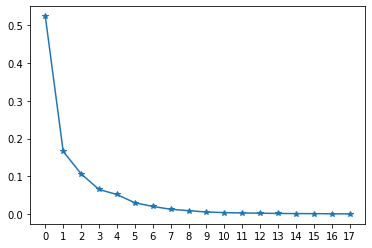

In [15]:
plt.xticks(np.arange(0,len(df.columns)))
plt.plot(np.arange(pc.n_components_),(pc.explained_variance_ratio_),'*-')

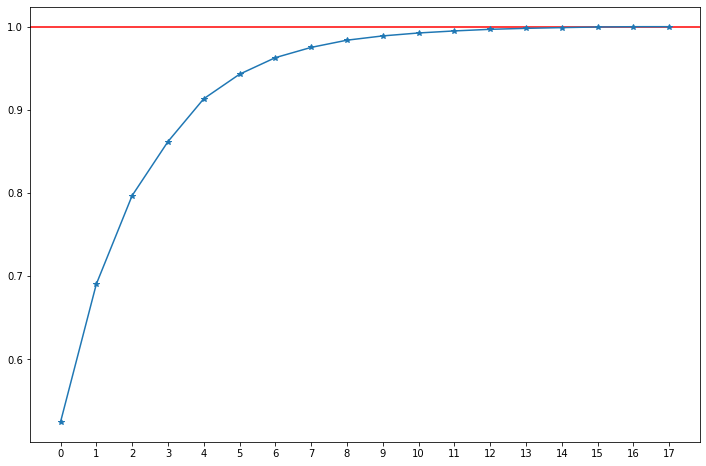

In [16]:
plt.figure(figsize = (12,8))
plt.axhline(1,c = 'r')
plt.xticks(np.arange(0,len(df.columns)))
plt.plot(np.arange(pc.n_components_),np.cumsum(pc.explained_variance_ratio_),'*-')

let n_components be 11

In [17]:
data_pca = df_pca.iloc[:,:11]

In [18]:
df.index = data_pca.index

In [19]:
pd.DataFrame(pc.components_[:11,:],columns = df_pca.columns,
                   index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8',
                            'PC-9','PC-10','PC-11'])#,'PC-12','PC-13','PC-14','PC-15','PC-16','PC-17','PC-18'])

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
PC-1,0.274447,0.294004,0.304380,0.268889,0.083020,0.098483,0.316689,-0.313205,0.313612,0.281286,0.309162,0.314164,0.270337,-0.025604,0.039680,0.063160,0.030941,0.079366
PC-2,-0.127106,0.134430,-0.072145,-0.176416,-0.098763,0.030207,0.044390,0.015254,0.057231,0.120324,0.061910,0.048021,0.210170,0.493794,-0.056260,-0.121035,-0.544492,-0.538882
PC-3,-0.115778,-0.036451,-0.055188,0.281805,0.645769,0.586412,-0.098585,0.056652,-0.112039,-0.024132,0.059723,-0.109453,-0.037063,0.275780,-0.110192,-0.080499,0.031728,0.056946
PC-4,0.080077,0.190342,-0.069371,-0.044651,0.030053,0.029750,-0.094417,0.085067,-0.091897,0.192294,-0.119476,-0.091318,0.204887,-0.071533,0.605083,-0.662058,0.101853,0.051579
PC-5,0.070197,-0.086673,0.038959,-0.043663,-0.038468,0.212001,-0.017016,0.075823,0.000739,-0.064243,0.002564,-0.019443,-0.063195,0.149127,0.729058,0.599762,-0.094108,-0.028860
PC-6,0.141269,-0.278132,-0.136323,0.255012,0.237902,-0.438916,0.116490,-0.147679,0.091503,-0.462569,0.230563,0.152146,-0.133617,0.232402,0.206512,-0.194571,0.146275,-0.249059
PC-7,0.478882,-0.232113,0.060174,-0.169695,-0.385741,0.485306,0.065837,0.015051,0.097730,-0.107288,0.114298,0.082243,-0.391192,0.117229,-0.077334,-0.285756,0.014073,0.000162
PC-8,-0.551289,-0.177147,0.436496,0.097423,-0.076288,0.173622,0.102868,-0.216261,0.070435,-0.251591,0.048844,0.036091,-0.124748,-0.340135,0.156635,-0.213790,-0.311235,-0.032482
PC-9,-0.470291,-0.008149,-0.176998,-0.223935,-0.297909,0.158407,0.065944,-0.167628,0.014811,-0.094669,0.301488,0.074007,0.241942,0.321738,0.022021,-0.006050,0.503554,0.171175
PC-10,-0.271012,0.087246,-0.214800,-0.055995,0.112777,-0.123445,0.169547,-0.145781,0.202573,0.477074,-0.119098,0.152180,-0.671019,0.132622,0.100709,-0.034329,0.021725,0.078010


##### Kmeans

In [20]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=17)
km.fit(df_pca.iloc[:,:11])
km_pred = km.fit_predict(data_pca)

In [21]:
km_pred

array([ 2,  2,  6, 14,  3,  7, 14, 16, 16, 16, 12,  2, 10,  0, 13, 11,  0,
       12, 13, 14,  5,  0, 12, 13,  0, 10,  4,  2, 14, 16, 15, 11,  9,  3,
        0, 12, 10, 13,  2, 11,  6,  2,  5,  9,  2,  7, 13, 11,  0, 14,  8,
       14, 10,  2,  0,  4, 10,  4,  4, 12, 10,  4,  0, 12, 10,  0,  1, 13,
        2, 10,  1,  9, 12,  0,  5,  4, 11,  8, 12,  5, 11, 13,  0,  1,  6,
        2, 12, 15,  4, 12, 15,  9,  3,  7, 14,  4,  1,  1,  5,  9, 10, 12,
        2,  4,  4,  2,  7, 10, 15,  7,  4,  2, 14,  4, 12,  2, 12, 12,  7,
       10, 10, 16,  1,  5, 15,  3,  2, 14,  4, 12, 16, 15,  9,  7,  0,  7,
       11, 14, 16, 10,  1, 16, 15, 12,  8, 16,  5, 16, 13,  6, 11,  5,  0,
       15, 16,  6,  9,  5,  6,  8,  7, 15,  2, 11,  1, 11,  9,  0, 13, 14,
        4, 10, 11, 11,  7,  0, 11,  7, 12,  8,  1,  9,  6,  9,  9,  9,  2,
       16,  6,  0, 14, 12, 12, 12,  0, 11,  5, 11, 15,  5,  9,  0, 12, 14,
        0,  2,  9,  4, 14,  6, 14, 15,  9, 13, 13,  9,  0, 14,  2, 11,  0,
        9, 16,  7,  9,  0

###### Finding right number of clusters

In [22]:
km_error = []

for i in range(1,len(df_pca.columns)):
    km = KMeans(n_clusters=i)
    km.fit(data_pca)
    km_error.append(km.inertia_)
print(km_error)

[14523.392885624271, 8513.479472066832, 6928.257248563736, 5630.300109443169, 5081.013436807899, 4603.547198781208, 4252.93662407459, 3988.3044687158235, 3752.3042925736545, 3563.7829118889385, 3397.6708302503343, 3246.0709254498447, 3146.0599670259235, 3017.5828063539807, 2946.717905260669, 2855.6046618639634, 2765.975506538179]


###### BY ELBOW METHOD

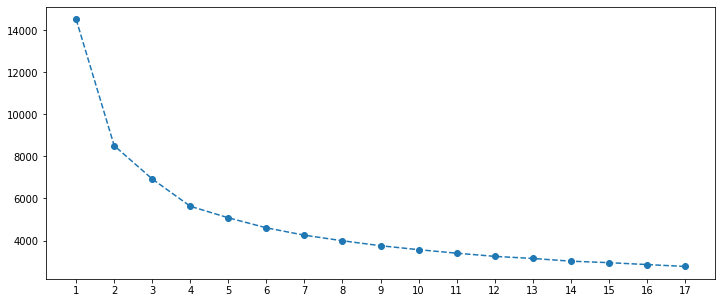

In [23]:
plt.figure(figsize = (12,5))
plt.xticks(range(1,len(df_pca.columns)))
plt.plot(np.arange(1,len(df_pca.columns)),np.array(km_error),'o--')


The change in error is alomost constant from cluster 4. so, Let the number of clusters be 3

###### Predicted the labels 

In [24]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
km.fit(data_pca)
km_predict = km.fit_predict(df_pca.iloc[:,:11])

In [25]:
data_pca['km_pre'] = km_predict


In [26]:
data_pca.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,km_pre
0,0.352249,-0.141027,0.961832,0.190872,0.069616,-0.740301,-0.882080,-0.388323,-0.908189,0.087236,0.011048,2
1,-1.578072,-0.422197,-0.365261,0.239334,0.685899,-0.530580,0.345639,0.258324,0.137883,-0.093291,0.497768,2
2,3.782556,0.253257,0.061756,1.216416,0.717337,0.728388,-0.015941,0.478896,-0.275968,-0.477401,0.258087,1
3,-1.713214,-2.819496,0.186835,0.379588,-0.357389,-0.514101,0.450872,-0.011059,-0.061825,0.456355,0.374730,2
4,0.532165,5.153595,11.400516,0.066717,3.242363,-0.360525,2.569695,-0.400351,2.111091,-0.332323,0.201103,0


In [27]:
data_pca.shape

(813, 12)

##### plotting the scatter plot for predicted 

In [28]:
km.cluster_centers_

array([[-2.67173172e+00,  1.68130749e+00, -1.33049927e-01,
         4.13987422e-02,  1.17990902e-01, -1.12260712e-01,
         8.32391803e-03,  1.78410963e-02, -5.24033270e-02,
         2.02181194e-02,  1.28780895e-02],
       [ 3.93703213e+00,  1.91892978e-01, -1.19027689e-01,
        -3.51060162e-02,  4.16703260e-02,  2.77785679e-02,
         5.58611208e-02, -1.83070260e-02, -4.65568034e-02,
        -2.43280505e-02, -1.97817127e-02],
       [-1.22176595e+00, -1.44858138e+00,  2.00891954e-01,
        -2.58189754e-03, -1.25086585e-01,  6.30036526e-02,
        -5.27847659e-02,  1.52704041e-03,  7.88548478e-02,
         4.70589290e-03,  6.55752019e-03]])

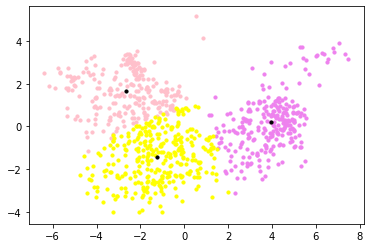

In [29]:
plt.scatter(p_comp[km_predict == 0, 0],p_comp[km_predict == 0, 1],s = 10,c = 'pink',label = 'bus')
plt.scatter(p_comp[km_predict == 1, 0],p_comp[km_predict == 1, 1],s = 10,c = 'violet',label = 'car')
plt.scatter(p_comp[km_predict == 2, 0],p_comp[km_predict == 2, 1],s = 10,c = 'yellow',label = 'van')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s = 10,c = 'black')

In [30]:
df['class'].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

In [31]:
data_pca['km_pre'].value_counts()

2    313
1    260
0    240
Name: km_pre, dtype: int64

In [32]:
data_pca.shape

(813, 12)

###### Hierarchical clusterering

In [33]:
from sklearn.cluster.hierarchical import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

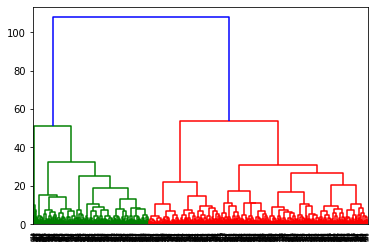

In [34]:
dendrogram(linkage(p_comp,'ward'))
plt.show()

Hierarchical clusters shows that 2 or 3 cluster would be optimum

Let us take 3 clusters

In [35]:
ag = AgglomerativeClustering(n_clusters=3)
ag.fit(data_pca.iloc[:,:-1])
ag_pred = ag.fit_predict(data_pca.iloc[:,:-1])

In [36]:
data_pca['agg_pred'] = ag_pred

In [37]:
ag_pred

array([2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 2, 0,
       2, 2, 1, 0, 2, 2, 0, 0, 0, 0, 2, 0, 1, 2, 0, 2, 2, 0, 1, 2, 2, 2,
       2, 0, 2, 0, 1, 0, 1, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 1, 2, 0, 1,
       0, 2, 2, 0, 2, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 2, 1, 0, 1, 2, 2, 1,
       2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 1, 0,
       2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 2, 2, 0, 0,
       2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 2, 1, 0, 2, 1, 1,
       0, 1, 2, 2, 1, 1, 0, 1, 2, 0, 0, 0, 2, 1, 2, 0, 2, 0, 0, 0, 0, 1,
       0, 0, 2, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 0, 2, 0, 2, 1, 0, 2, 0,
       1, 2, 2, 1, 2, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2, 2, 2, 2, 1, 0, 2, 0,
       1, 2, 0, 0, 2, 1, 2, 2, 0, 0, 1, 2, 1, 2, 0, 2, 1, 0, 0, 0, 1, 2,
       0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 1, 2, 2, 2, 1, 0, 0, 2, 2, 1, 2,
       2, 0, 2, 2, 0, 2, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 2, 0, 1, 0,
       0, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 2, 0, 0, 2,

##### to find which method is better

###### grouping the cluseters into right category 

In [40]:
acc = 0
for i in range(3):
    for j in range(3):
        for k in range(3):
            data_pca['converted_class'] = df['class'].map({'car':i,'van':j,'bus':k})
            k = accuracy_score(data_pca['converted_class'],data_pca['km_pre'])
            a = accuracy_score(data_pca['converted_class'],data_pca['agg_pred'])
            if k > a and k > acc:
                acc = k
                data_pca['real_class'] = data_pca['converted_class']
                print('km_mean gives max acc')
            elif a > k and a > acc:
                acc = a
                data_pca['real_class'] = data_pca['converted_class']
                print('agg_mean gives max acc') # which algorithm gives maximum accuracy
            data_pca['converted_class'] = df['class'].map({i:'car',j:'van',k:'bus'})
print(acc) # maximum accuracy we can get using both algorithms.

agg_mean gives max acc
agg_mean gives max acc
agg_mean gives max acc
agg_mean gives max acc
0.4920049200492005


In [41]:
data_pca['real_class'] # mapped class values of best accuracy score

0      2
1      2
2      0
3      2
4      2
5      2
6      2
7      2
8      2
9      0
10     2
11     2
12     2
13     0
14     2
15     2
16     0
17     2
18     2
19     2
20     2
21     0
22     2
23     0
24     0
25     2
26     0
27     2
28     0
29     0
      ..
783    2
784    0
785    0
786    0
787    0
788    0
789    2
790    0
791    0
792    0
793    0
794    0
795    2
796    2
797    2
798    2
799    0
800    0
801    0
802    2
803    2
804    0
805    2
806    2
807    0
808    0
809    2
810    0
811    0
812    2
Name: real_class, Length: 813, dtype: int64

Let us compare the metrics of predictions

In [42]:
df.head(3)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car


In [43]:
data_pca.head(3)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,km_pre,agg_pred,converted_class,real_class
0,0.352249,-0.141027,0.961832,0.190872,0.069616,-0.740301,-0.882080,-0.388323,-0.908189,0.087236,0.011048,2,2,NaN,2
1,-1.578072,-0.422197,-0.365261,0.239334,0.685899,-0.530580,0.345639,0.258324,0.137883,-0.093291,0.497768,2,2,NaN,2
2,3.782556,0.253257,0.061756,1.216416,0.717337,0.728388,-0.015941,0.478896,-0.275968,-0.477401,0.258087,1,1,NaN,0


In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [45]:
def metrics(y_true, y_pred):
    print(confusion_matrix(y_true,y_pred))
    print(accuracy_score(y_true,y_pred))

In [46]:
data_pca.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'km_pre', 'agg_pred', 'converted_class',
       'real_class'],
      dtype='object')

In [47]:
metrics(data_pca['real_class'],data_pca['km_pre'])

[[ 71 212 130]
 [  0   0   0]
 [169  48 183]]
0.3124231242312423


In [48]:
metrics(data_pca['real_class'],data_pca['agg_pred'])

[[187 141  85]
 [  0   0   0]
 [156  31 213]]
0.4920049200492005


In [49]:
# We can see AgglomerativeClustering gives best model.

##### Splitting the independent  and target for building model

In [50]:
data_pca.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'km_pre', 'agg_pred', 'converted_class',
       'real_class'],
      dtype='object')

In [51]:
data_pca.drop(['km_pre','converted_class','real_class'],1,inplace = True)

In [52]:
data_pca.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'agg_pred'],
      dtype='object')

In [53]:
X = data_pca.drop('agg_pred',1)
y = data_pca['agg_pred']

In [54]:
# splitting the data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 2)

In [55]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(569, 11)
(244, 11)
(569,)
(244,)


In [56]:
# With pca

from sklearn.svm import SVC
sv_pca = SVC()
sv_pca.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [57]:
sv_pred_pca = sv_pca.predict(X_test)

In [58]:
metrics(y_test,sv_pred_pca)

[[93  4  1]
 [ 0 61  0]
 [ 4  0 81]]
0.9631147540983607


In [59]:
# without pca

df['ag_predict'] = data_pca['agg_pred']


In [60]:
df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class', 'ag_predict'],
      dtype='object')

In [61]:
df.drop(['class'],1,inplace = True)

In [62]:
ind = df.drop('ag_predict',1)
dep = df.ag_predict

In [63]:
X_train_np,X_test_np,y_train_np,y_test_np = train_test_split(ind,dep,test_size =0.3, random_state = 2)

In [65]:
sv = SVC()
sv.fit(X_train_np,y_train_np)
sv_pred = sv.predict(X_test_np)

In [66]:
metrics(y_test,sv_pred)

[[98  0  0]
 [61  0  0]
 [83  0  2]]
0.4098360655737705


We can clearly see that the values predicted pca shows more accuracy than original dataset(without pca)

##### Hyperparameter tuning

In [67]:
from sklearn.model_selection import GridSearchCV

params = {'C' : [0.01, 0.05, 0.5, 1],
         'kernel' : ['linear', 'rbf']}

svm = SVC()


sv_gs = GridSearchCV(svm,params, cv = 5)
sv_gs.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.05, 0.5, 1],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [68]:
sv_gs.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [69]:
# Building a model with best estimator

svm_fin = SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

svm_fin.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [70]:
print(svm_fin.score(X_train,y_train))


0.984182776801406


In [71]:
svm_fin_predict = svm_fin.predict(X_test)

In [72]:
metrics(y_test,svm_fin_predict)

[[93  4  1]
 [ 0 61  0]
 [ 4  0 81]]
0.9631147540983607


In [74]:
print(classification_report(y_test,svm_fin_predict))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95        98
           1       0.94      1.00      0.97        61
           2       0.99      0.95      0.97        85

    accuracy                           0.96       244
   macro avg       0.96      0.97      0.96       244
weighted avg       0.96      0.96      0.96       244



The final predicted accuracy with svm is found to be 96.31%